In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pkl
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from tabulate import tabulate

In [11]:
def fetch_result(variants, path = "Univariate_Results"):
    """
    I/P : 
    variants : List of model variants.
    
    O/P : 
    (1) Training Loss Plot
    (2) Metrics [R2,MAE,RMSE,MAPE]
    
    function returns a dictionary whose keys are model variant , dataset, r2_score, mae, and rmse.
    """
    #Iterate through all the dataset folders, and extract the current model variant's details.
    if (path == "Univariate_Results"):
        folders = os.listdir("./Univariate_Results/")[1:]
    else:
        folders = os.listdir("./Multivariate_Results/")
        
    #Dictionary to save the values of the model variants' performance in a dataframe.
    global_dict = {}
    
    for folder in folders:
        #if folder == 'Wolfer': continue
        df_dict = {}
        df_dict["Model Variant"] = []
        df_dict["R2"] = []
        df_dict["MAE"] = []
        df_dict["RMSE"] = []
        df_dict["(MAE/Mean)*100"] = []
        df_dict["(RMSE/Mean)*100"] = []
        df_dict["CORR"] = []

        print ("\n-----------------------------")
        print ("Currently in Folder : ",folder)
        fig = plt.figure(figsize=(12,8))
        
        for variant in variants:
                
            df = pd.read_csv("./" + path + "/" + folder +"/"+variant+str(".csv"))
            loss = pkl.load(open("./"+ path + "/" + folder +"/"+variant+str(".pkl"),"rb"))

            #Plot the Training Loss versus epochs.
#             plt.title("Rate of Change of Training Loss")
            plt.plot(loss["val_rmse"])
            plt.legend(variants,fontsize=15)
            plt.grid(True)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.ylabel("Loss Value",fontsize=15)
            plt.xlabel("Epochs",fontsize=15)

            """
            #debug

            #Print the Corresponding model's metrics on the current dataset.
            print ("Model Metrics for,",variant, " : ")
            print ("R2   : ",r2_score(df["Ground truth"],df["Linear Reg"]))
            print ("MAE  : ",mean_absolute_error(df["Ground truth"],df["Linear Reg"]))
            print ("RMSE : ",np.sqrt(mean_squared_error(df["Ground truth"],df["Linear Reg"])))
            """
            if(variant == "M3V1"):
                df_dict["Model Variant"].append(variant)
                df_dict["R2"].append(r2_score(df["Ground truth"],df["Model Predictions"]))
                df_dict["MAE"].append(mean_absolute_error(df["Ground truth"],df["Model Predictions"]))
                df_dict["RMSE"].append(np.sqrt(mean_squared_error(df["Ground truth"],df["Model Predictions"])))
                df_dict["(MAE/Mean)*100"].append( (mean_absolute_error(df["Ground truth"],df["Model Predictions"])/(np.mean(df["Ground truth"])))*100 )
                df_dict["(RMSE/Mean)*100"].append( (np.sqrt(mean_squared_error(df["Ground truth"],df["Model Predictions"]))/(np.mean(df["Ground truth"])))*100 )
                df_dict["CORR"].append(np.corrcoef(df["Ground truth"],df["Model Predictions"])[0,1])
                
            else:
                df_dict["Model Variant"].append(variant)
                df_dict["R2"].append(r2_score(df["Ground truth"],df["Linear Reg"]))
                df_dict["MAE"].append(mean_absolute_error(df["Ground truth"],df["Linear Reg"]))
                df_dict["RMSE"].append(np.sqrt(mean_squared_error(df["Ground truth"],df["Linear Reg"])))
                df_dict["(MAE/Mean)*100"].append( (mean_absolute_error(df["Ground truth"],df["Linear Reg"])/(np.mean(df["Ground truth"])))*100 )
                df_dict["(RMSE/Mean)*100"].append( (np.sqrt(mean_squared_error(df["Ground truth"],df["Linear Reg"]))/(np.mean(df["Ground truth"])))*100 )
                df_dict["CORR"].append(np.corrcoef(df["Ground truth"],df["Linear Reg"])[0,1])
                
        plt.show()
        fig.savefig(os.path.join(path,folder,"loss_curve_"+folder+".png"))
        res_df = pd.DataFrame()
        for key in df_dict.keys():
            res_df[key] = df_dict[key]

        global_dict[folder] = res_df

    return global_dict


-----------------------------
Currently in Folder :  Wolfer


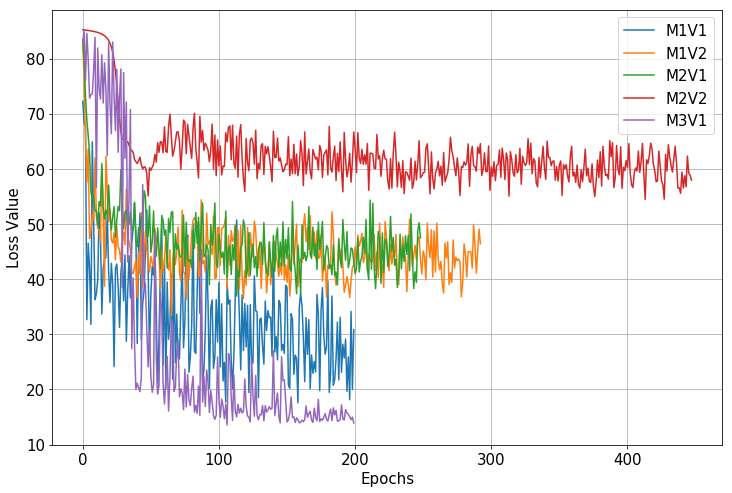


-----------------------------
Currently in Folder :  PFE


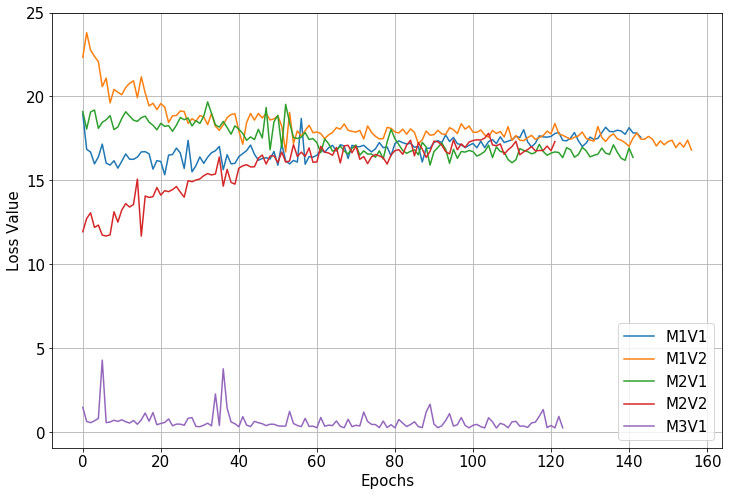


-----------------------------
Currently in Folder :  Exchange


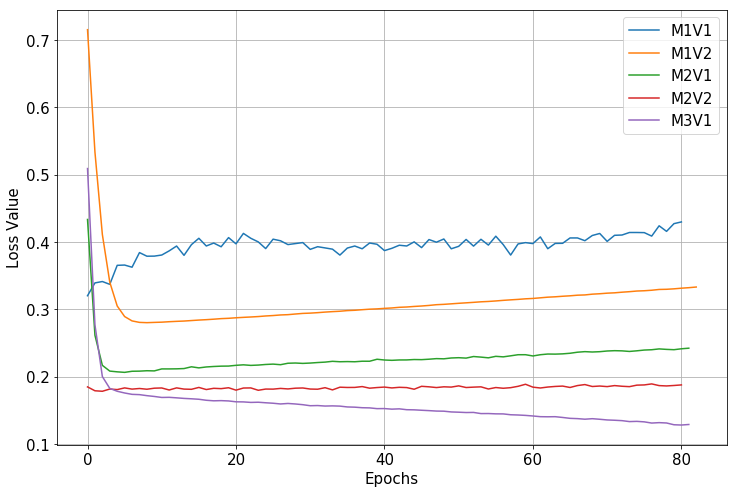


-----------------------------
Currently in Folder :  WMT


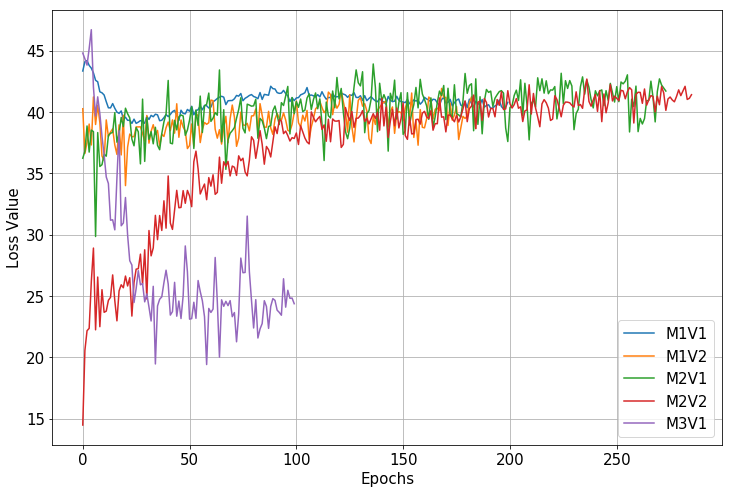


-----------------------------
Currently in Folder :  GlobalLandTemp


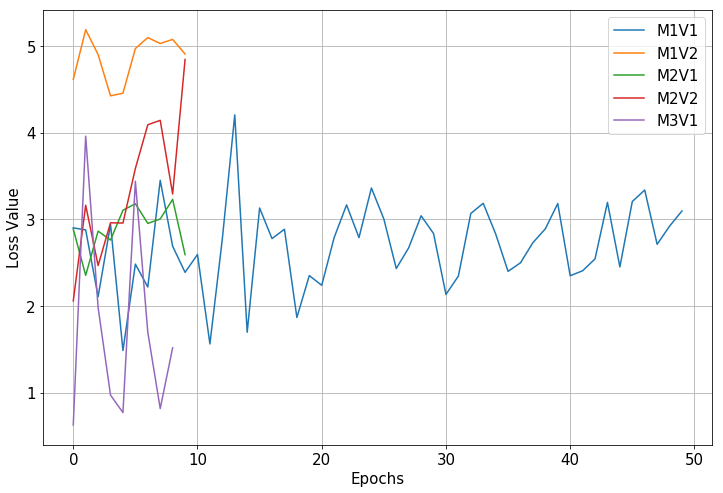


-----------------------------
Currently in Folder :  Jena


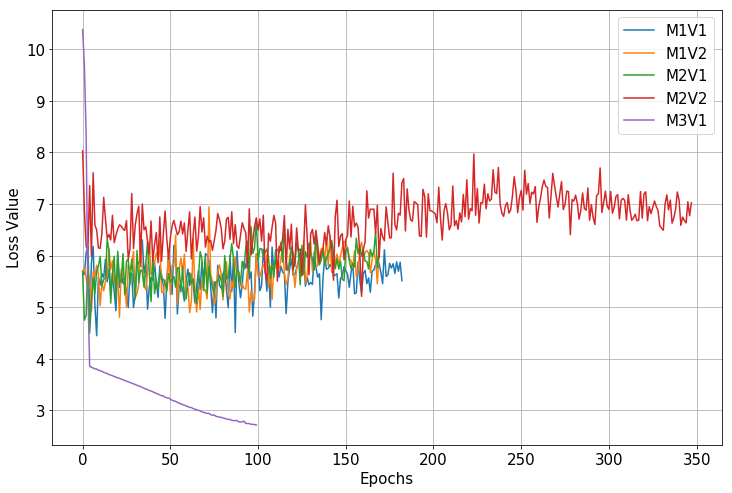


-----------------------------
Currently in Folder :  AMZN


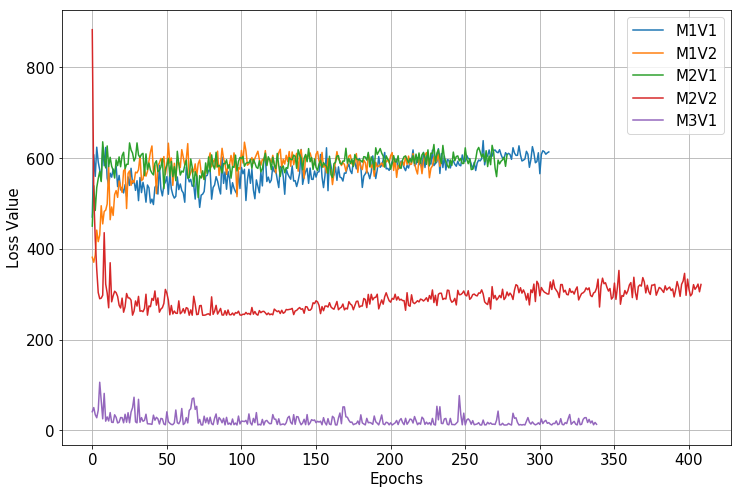


-----------------------------
Currently in Folder :  DNB


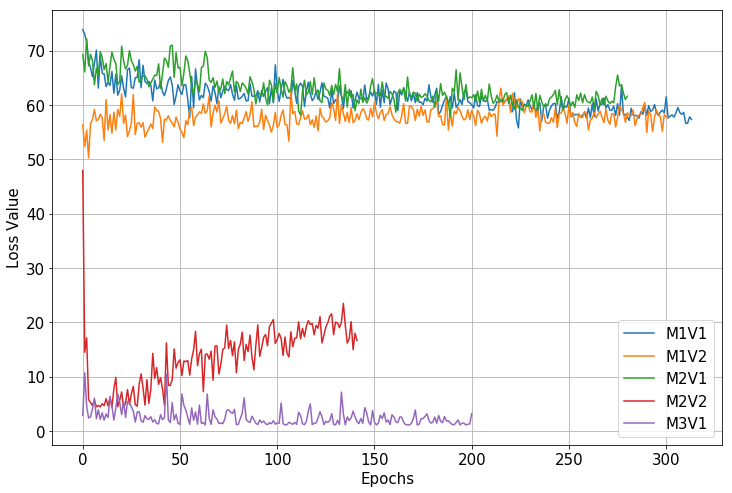


-----------------------------
Currently in Folder :  Traffic


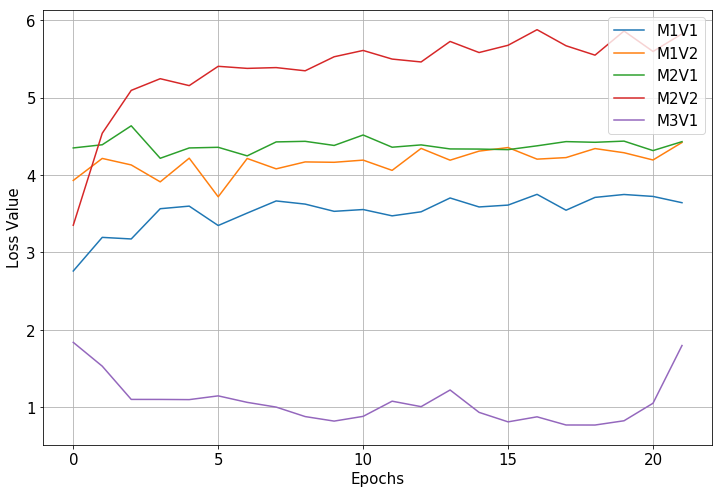


-----------------------------
Currently in Folder :  Sunspot


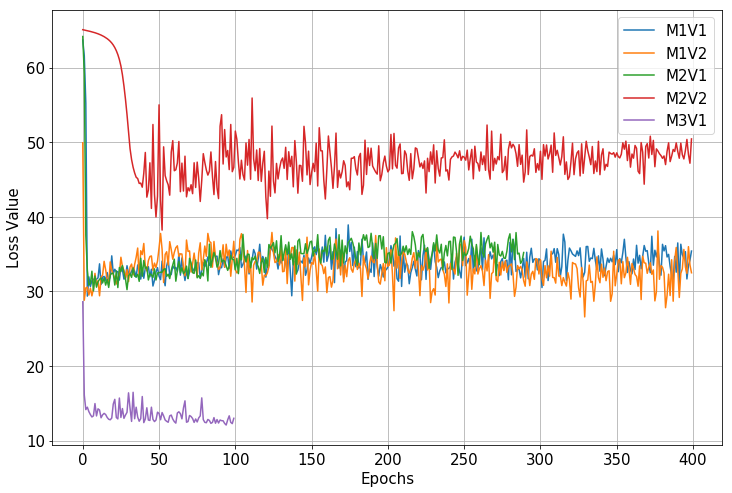


-----------------------------
Currently in Folder :  FB


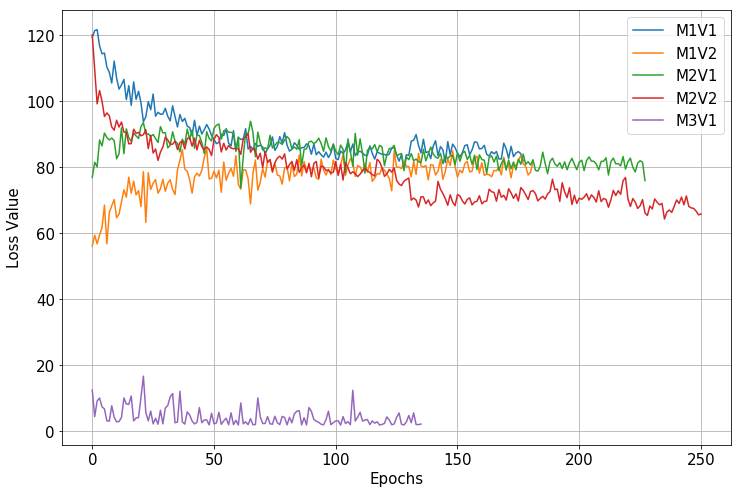

Key :  Wolfer
+----+-----------------+----------+---------+---------+------------------+-------------------+----------+
|    | Model Variant   |       R2 |     MAE |    RMSE |   (MAE/Mean)*100 |   (RMSE/Mean)*100 |     CORR |
+====+=================+==========+=========+=========+==================+===================+==========+
|  0 | M1V1            | 0.855001 | 12.4449 | 18.3219 |          19.4126 |           28.58   | 0.925097 |
+----+-----------------+----------+---------+---------+------------------+-------------------+----------+
|  1 | M1V2            | 0.759209 | 19.1564 | 24.6087 |          27.7016 |           35.5861 | 0.871729 |
+----+-----------------+----------+---------+---------+------------------+-------------------+----------+
|  2 | M2V1            | 0.707382 | 21.473  | 27.1281 |          31.0516 |           39.2293 | 0.841572 |
+----+-----------------+----------+---------+---------+------------------+-------------------+----------+
|  3 | M2V2            | 0.60842

In [12]:
df = fetch_result(["M1V1","M1V2","M2V1","M2V2","M3V1"], path = "Univariate_Results")
for key in df.keys():
    print ("Key : ",key)
    print (tabulate(df[key],headers=list(df[list(df.keys())[0]].columns),tablefmt="grid"))
    print ("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n\n")

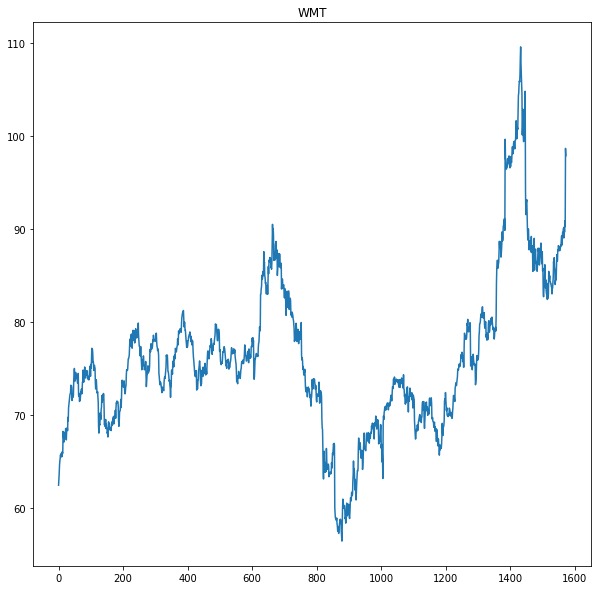

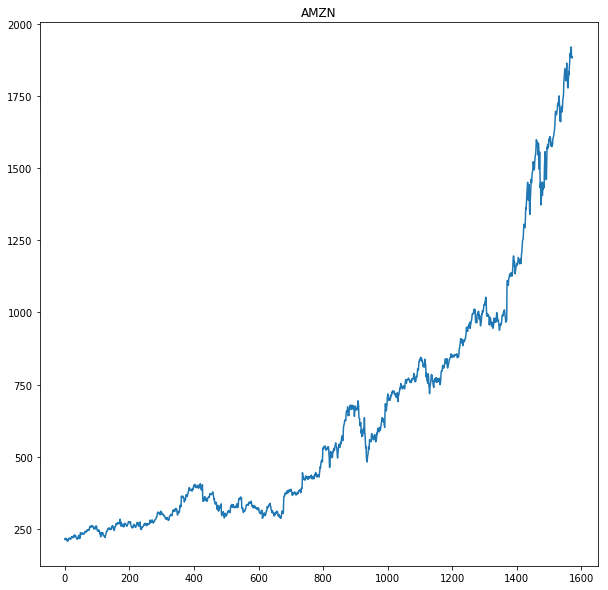

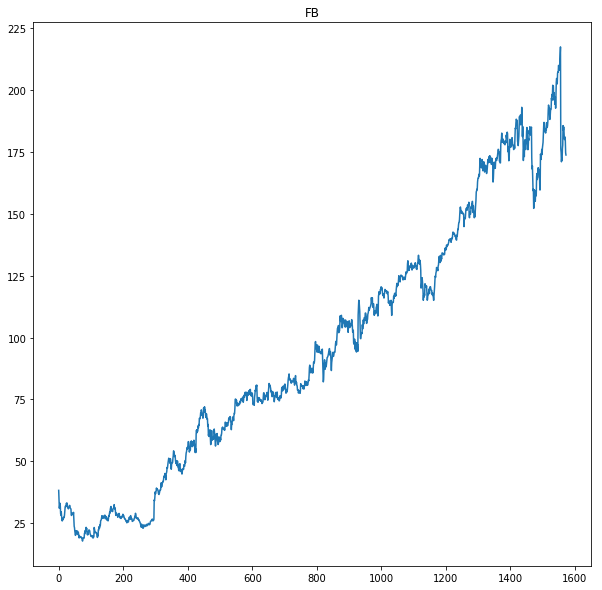

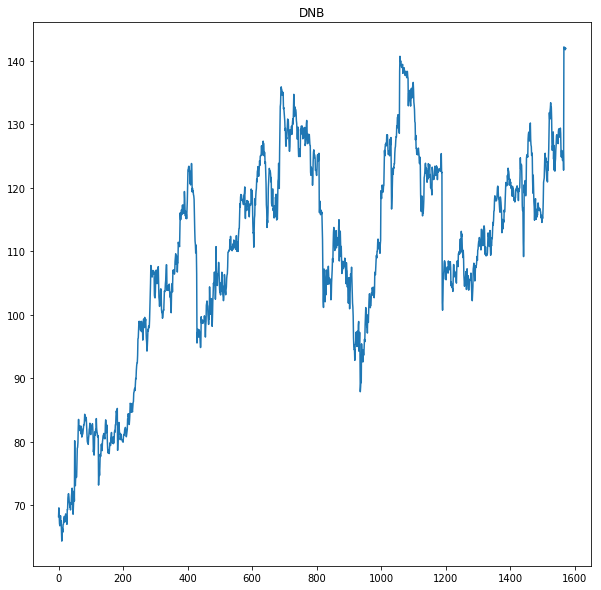

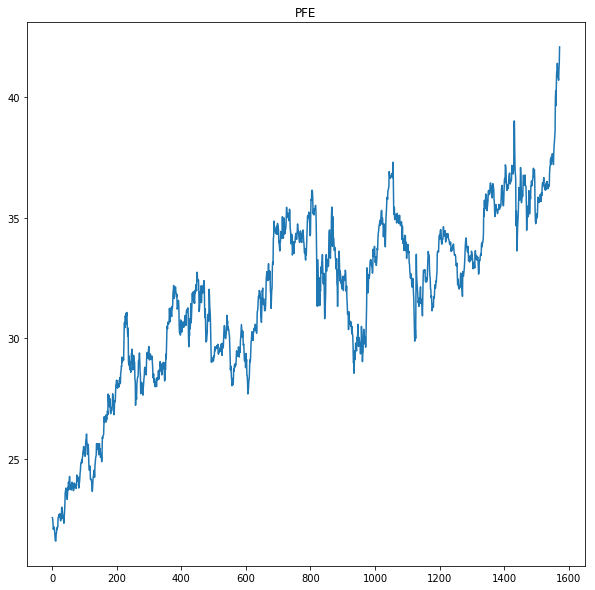

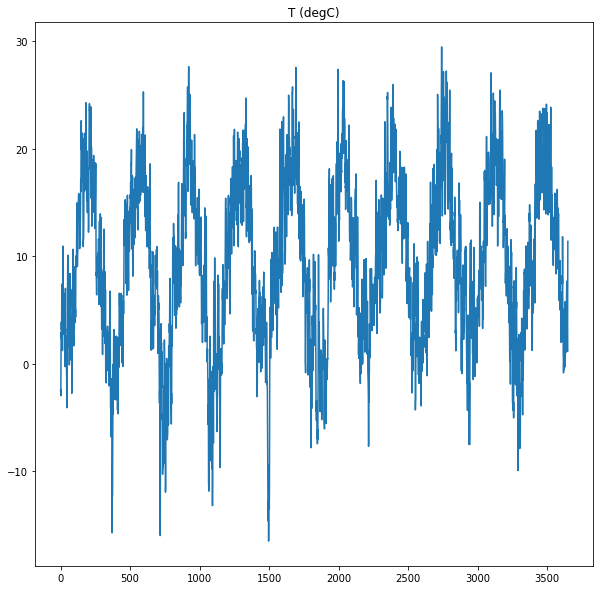

In [4]:
plt.figure(figsize=(10,10))
plt.title("WMT")
plt.plot(pd.read_csv("final5Stocks.csv")['WMT'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("AMZN")
plt.plot(pd.read_csv("final5Stocks.csv")['AMZN'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("FB")
plt.plot(pd.read_csv("final5Stocks.csv")['FB'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("DNB")
plt.plot(pd.read_csv("final5Stocks.csv")['DNB'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("PFE")
plt.plot(pd.read_csv("final5Stocks.csv")['PFE'])
plt.show()

plt.figure(figsize=(10,10))
plt.title("T (degC)")
plt.plot(pd.read_csv("Jena_time_series_day_wise.csv")['T (degC)'])
plt.show()